# Reward samples from physical robot interactions
See: https://www.tokic.com/the-crawling-robot/
![title](https://github.com/micheltokic/crawlingrobot/blob/master/hardware-robot-reward-model.png?raw=true)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Actions refer to columns in RewardModel 
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
ACTIONS =          np.array([ UP,   RIGHT,   DOWN,   LEFT], dtype=int)
ACTIONS_READABLE =          ["UP", "RIGHT", "DOWN", "LEFT"]

In [5]:
###################################
## Definition of reward model
### (no need to do anything here!)
###################################

# grid size
ROWS = 5
COLS = 5

RewardModel = np.zeros((COLS, ROWS, len(ACTIONS)))

# 1. row (ACTIONS: UP, RIGHT, DOWN, LEFT)
RewardModel[0][0] = [  0,  0,  0,   0]
RewardModel[0][1] = [  0,  0,  0,   0]
RewardModel[0][2] = [  0,  0,  0,   0]
RewardModel[0][3] = [  0,  0,  0,   0]
RewardModel[0][4] = [  0,  0,  0,   0]
# 2.row
RewardModel[1][0] = [  0,  0,  0,   0]
RewardModel[1][1] = [  0,  0,  0,   0]
RewardModel[1][2] = [  0,  0,  0,   0]
RewardModel[1][3] = [  0,  0,  4,   0]
RewardModel[1][4] = [  0,  0,  6,   0]
#3. row
RewardModel[2][0] = [  0,  0,  9,   0]
RewardModel[2][1] = [  0,  0, 11,   0]
RewardModel[2][2] = [  0, 15,  0,   0]
RewardModel[2][3] = [ -3, 12, 17, -10]
RewardModel[2][4] = [ -4,  0, 16, -11]
#4. row
RewardModel[3][0] = [ -5, 17, 19,   0]
RewardModel[3][1] = [ -9, 17, 20,  -8]
RewardModel[3][2] = [-16, 13, 19, -12]
RewardModel[3][3] = [-18, 12, 23, -14]
RewardModel[3][4] = [-16,  0, 23, -18]
#5. row
RewardModel[4][0] = [ -8, 14,  0,   0]
RewardModel[4][1] = [-26, 16,  0,  -6]
RewardModel[4][2] = [-18,  9,  0, -14]
RewardModel[4][3] = [-26, 10,  0, -15]
RewardModel[4][4] = [-30,  0,  0, -15]

print (RewardModel)

[[[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   4.   0.]
  [  0.   0.   6.   0.]]

 [[  0.   0.   9.   0.]
  [  0.   0.  11.   0.]
  [  0.  15.   0.   0.]
  [ -3.  12.  17. -10.]
  [ -4.   0.  16. -11.]]

 [[ -5.  17.  19.   0.]
  [ -9.  17.  20.  -8.]
  [-16.  13.  19. -12.]
  [-18.  12.  23. -14.]
  [-16.   0.  23. -18.]]

 [[ -8.  14.   0.   0.]
  [-26.  16.   0.  -6.]
  [-18.   9.   0. -14.]
  [-26.  10.   0. -15.]
  [-30.   0.   0. -15.]]]


In [10]:
####################################
# Implement ValueIteration function
####################################
def ValueIteration (R, maxIterations = 10000, theta = 0.000001, gamma=0.999):
    
    rows, cols = R.shape[0:2]
    
    V = np.zeros((rows, cols))
    pi = np.zeros((rows, cols), dtype=int)
    
    iteration = 0
    end = False
    while (end == False):
        
        error = 0
        iteration += 1
        
        for x in range( 0, cols):
            for y in np.arange (0, rows):
        
                bestNewV = -np.inf
                
                for action in ACTIONS:
                    newX = x;
                    newY = y;
                    reward = R[y][x][action]

                    ## TODO: Recompute newX/newY according to action to be evaluated
                    ##       => Forbid actions across grid boundaries!
                    if action == DOWN and y+1 < rows:
                        newY = y+1
                    elif action == UP and y-1 >= 0:
                        newY = y-1
                    elif action == LEFT and x-1 >= 0:
                        newX = x-1
                    elif action == RIGHT and x+1 < cols:
                        newX = x+1
                    else:
                        continue

                    ## TODO:  recompute value of current state
                    newV = reward + gamma*V[newY][newX]
                    
                    ## TODO: memorize estimated best action and hightes V value in current state s
                    if newV > bestNewV:
                        bestNewV = newV 
                        bestAction = action

                ## TODO: measure maximum value error in current iteration
                error = max(error, abs(bestNewV - V[y][x]))
                
                # update estimated state value and policy action
                V[y][x] = bestNewV
                pi[y][x] = bestAction
                
        ## TODO: check iteration termination -> OK
        if (iteration >= maxIterations or error <= theta):
            end = True
            print ("Ending at iteration #%d" % iteration)
            print ("Cum. error = %f" % error)
    return V, pi, iteration, error

In [11]:
###################################
### Plot policy function
### (no need to do anything here!)
###################################
def plotPolicy (policy, gamma):

    cols, rows = policy.shape

    Y = np.arange (0, rows)
    X = np.arange (0, cols)
    YN, XN = np.meshgrid(Y, X)
    #print ("XN=%s" % XN)
    #print ("YN=%s" % YN)

    for row in np.arange(0, rows, 1):
        for col in X:

            toX = 0
            toY = 0

            action = policy[row][col]
            if action == UP:
                toY = -1
            elif action == DOWN:
                toY = +1
            elif action == RIGHT:
                toX = +1
            elif action == LEFT:
                toX = -1

            ## TODO: Adapt for x/y boundaries
            XN[row][col] = toX
            YN[row][col] = toY
        print("")

    
    
    fig, ax = plt.subplots()
    q = ax.quiver(X, Y, XN, YN, angles="xy")
    plt.xlabel ("x")
    plt.ylabel ("y")
    plt.xticks(np.arange(0, 5, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.title ("gamma=%.3f" % gamma)
    
    ## reverse Y-axis => in order that plot fits to above image
    plt.gca().invert_yaxis()  
    ## move x labels to top of plot
    ax.xaxis.tick_top()
    
    plt.show()

Ending at iteration #699
Cum. error = 0.000010
V=[[579.04751078 573.25703568 567.52446532 561.84922067 556.23072846]
 [584.8964853  579.04752045 573.25704524 567.52447479 561.84923004]
 [590.80453915 584.89649376 579.04752882 563.25705353 552.23073774]
 [587.68136224 576.44582882 558.68137053 539.80115683 530.70843036]
 [573.80454862 562.06650313 542.4458381  522.02137972 501.80116592]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 3 3]
 [2 3 3 3 0]
 [1 2 3 2 0]
 [0 3 3 3 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'LEFT' 'LEFT']
 ['DOWN' 'LEFT' 'LEFT' 'LEFT' 'UP']
 ['RIGHT' 'DOWN' 'LEFT' 'DOWN' 'UP']
 ['UP' 'LEFT' 'LEFT' 'LEFT' 'LEFT']]







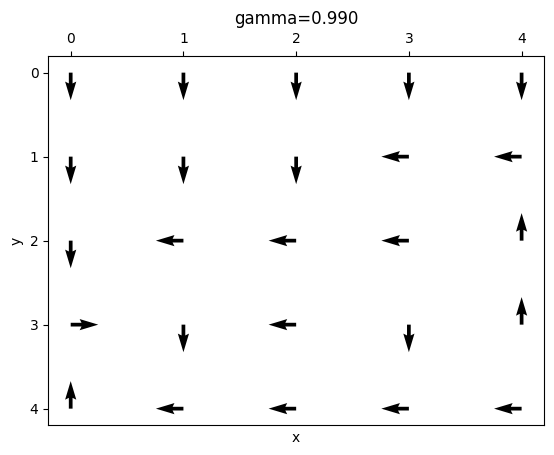

In [12]:
#################################################
### Learn and plot policy for given R and gamma
#################################################
# Run value iteration
gamma = 0.99
V, policy, iteration, error = ValueIteration(R=RewardModel, gamma=gamma, theta=0.00001, maxIterations=10000)
print ("V=%s" % V)

# construct array with readable actions
print ("policy (numeric)=\n%s" % policy)
policyReadable = np.array([[ACTIONS_READABLE[int(e)] for e in sub] for sub in policy])
print ("policy (readable)=\n%s" % policyReadable)

# Plot policy
plotPolicy (policy=policy, gamma=gamma)

Ending at iteration #2
Cum. error = 0.000000
Ending at iteration #8
Cum. error = 0.000001
Ending at iteration #11
Cum. error = 0.000006
Ending at iteration #15
Cum. error = 0.000010
Ending at iteration #25
Cum. error = 0.000005
Ending at iteration #36
Cum. error = 0.000007
Ending at iteration #46
Cum. error = 0.000009
Ending at iteration #67
Cum. error = 0.000009
Ending at iteration #699
Cum. error = 0.000010


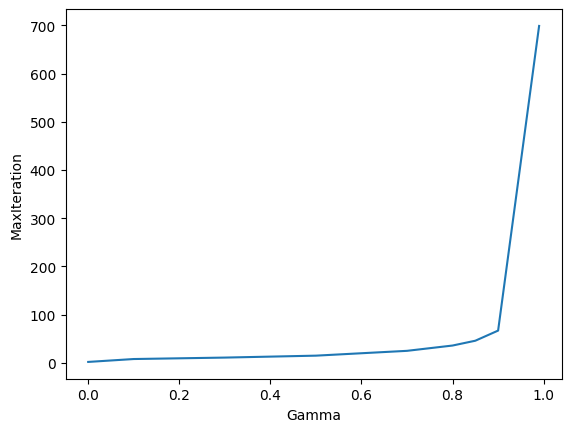

In [22]:
"""
Erstellen Sie einen Line-Plot mit: • X-Achse:
• Y-Achse: Anzahl Iterationen bis zur Konvergenz bei →Was stellen Sie fest?
"""

gammas = [0.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.99]
iters = []
policies = []
for gamma in gammas:
    # Run value iteration
    V, policy, iteration, error = ValueIteration(R=RewardModel, gamma=gamma, theta=0.00001, maxIterations=10000)
    iters.append(iteration)
    policies.append(policy)
plt.plot(gammas, iters)
plt.xlabel('Gamma')
plt.ylabel('MaxIteration')
plt.show()

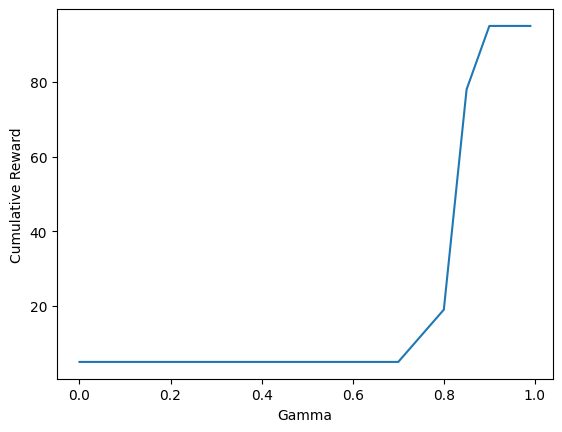

In [23]:
"""
Erstellen Sie einen Line-Plot mit: • X-Achse:
• Y-Achse: kumulierter Reward für 20 Schritte wenn dieser Policy auf dem Reward-Modell gefolgt wird bei Start in Zustand oben rechts: s_init=(0, 4).
→Was stellen Sie fest?
"""

def simulate_policy(R, policy, s_init, steps):
    y, x = s_init
    total_reward = 0
    for _ in range(steps):
        action = policy[y][x]
        reward = R[y][x][action]
        total_reward += reward
        if action == DOWN and y+1 < R.shape[0]:
            y += 1
        elif action == UP and y-1 >= 0:
            y -= 1
        elif action == LEFT and x-1 >= 0:
            x -= 1
        elif action == RIGHT and x+1 < R.shape[1]:
            x += 1
    return total_reward


cum_rewards = []
s_init = (0, 4)
steps = 20
for i in range(0, len(gammas)):
    total_reward = simulate_policy(RewardModel, policies[i], s_init, steps)
    cum_rewards.append(total_reward) 
        
plt.plot(gammas, cum_rewards)
plt.xlabel('Gamma')
plt.ylabel('Cumulative Reward')
plt.show()

In [28]:
"""
-> 0.9 ist optimal
"""
print("Gamma:", gammas[6])
print("Rechenzeit:", iters[6])
print("Reward:", cum_rewards[6])

print("---")

print("Gamma:", gammas[7])
print("Rechenzeit:", iters[7])
print("Reward:", cum_rewards[7])

print("---")

print("Gamma:", gammas[8])
print("Rechenzeit:", iters[8])
print("Reward:", cum_rewards[8])

Gamma: 0.85
Rechenzeit: 46
Reward: 78.0
---
Gamma: 0.9
Rechenzeit: 67
Reward: 95.0
---
Gamma: 0.99
Rechenzeit: 699
Reward: 95.0
